# An Incremental Implementation

Is there a way that we could generate unique random numbers without keeping track of all the numbers generated so far?

In [97]:
import random
from typing import Generator

def generate_unique_random_numbers(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    if max_num - min_num + 1 < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")
    
    remaining_count = batch_size
    next_max = max_num - remaining_count + 1

    while remaining_count > 0:
        number = random.randint(min_num, next_max)
        min_num = number + 1
        next_max += 1
        remaining_count -= 1
        yield number

In [96]:
list(generate_unique_random_numbers(0, 9, 3))

min_num = 0
next_max = 7
number = 6
min_num = 7
next_max = 8
number = 8
min_num = 9
next_max = 9
number = 9


[6, 8, 9]

## Distribution

The distribution of this approach is not even. It heavily biases larger numbers.

Chi-Square Statistic: 601.3866666666668
P-Value: 1.0553615722343614e-123


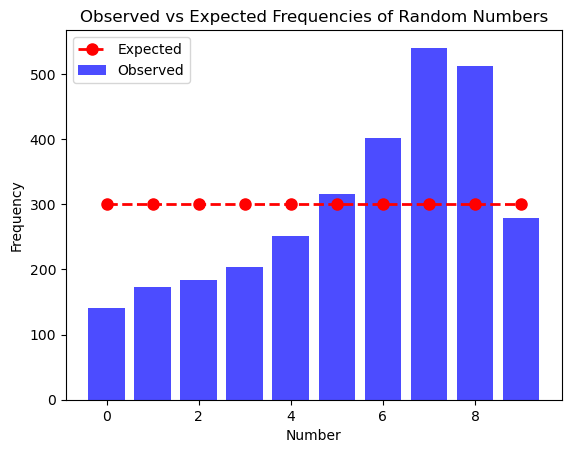

In [3]:
import run

run.plot(generate_unique_random_numbers, 0, 9, 3, 1000)

## Execution Time

The upside is that the execution time is linear relative to the batch size.

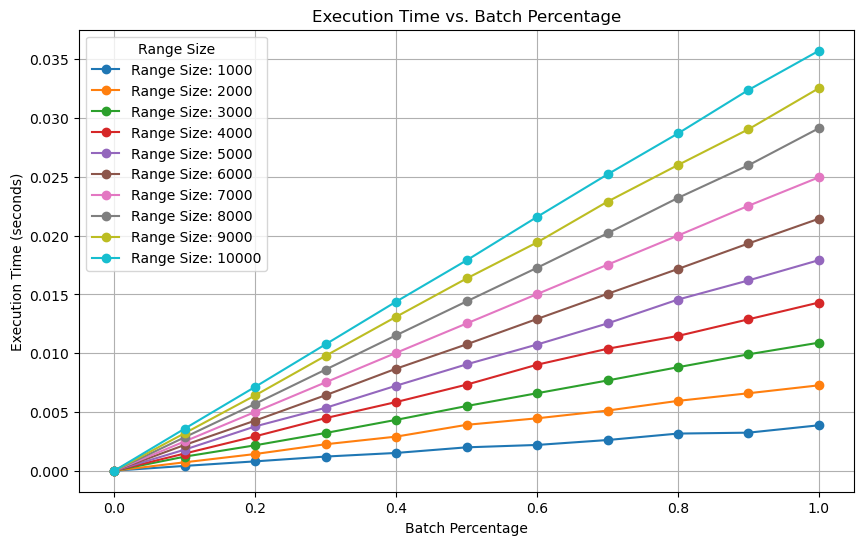

In [4]:
import plot

df = run.measure_time(lambda range_size, batch_size: generate_unique_random_numbers(1, range_size, batch_size))
plot.execution_time(df)

## Memory Usage

The memory usage is constant.